# Prerequisites

# class_sz

This dependency is needed for two reasons.

1. It enables exact backgournd + emulated spectra runs (using the cosmopower emulators).
2. It runs allows to run class v2.9.4

To intstall class_sz, follow carefully the instructions given in the README file of the code repository. 

In [2]:
import classy_sz
classy_sz.__file__

Metal device set to: Apple M1 Pro


2023-05-11 14:29:25.132729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-11 14:29:25.133002: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

## cosmopower

To install cosmopower, visit:

https://github.com/alessiospuriomancini/cosmopower


Check cosmopower is installed:

In [3]:
import cosmopower

## soliket

you need to be on the master branch of soliket.

## LATMFLike and dr6mflike

you need these two codes installed. 

## cobaya

To install cobaya, visit: 

https://cobaya.readthedocs.io/en/latest/installation.html

Check cobaya is installed:

In [4]:
import cobaya

## getdist

To install getdist, visit:

https://getdist.readthedocs.io/en/latest/intro.html

Check getdist is installed


In [5]:
import getdist

## cosmopower emulators

Make a cosmopower-organtization repository to store the emulaotors. It can be wherever on your system: <br>

$ mkdir cosmopower-organtization <br>

Then clone the emulators inside it: <br>

$ cd cosmopower-organtization <br>

$ git clone https://github.com/cosmopower-organization/lcdm.git <br>

Now we need to set the path to this repository. <br>
Mine is several levels above where we are now, so: (**adapt to your needs!**)

In [6]:
import os
root_path = os.path.abspath("")
path_to_cosmopower_organization = root_path + '/../../../../../cosmopower-organization/' 

Finally, the path to the emulators is:

In [7]:
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'

Check that these paths are correctly set:

In [8]:
import subprocess
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'
str_cmd_subprocess = ["ls",path_to_emulators]
print('inside lcdm:')
print(subprocess.call(str_cmd_subprocess))



inside lcdm:
PK
PP
README.md
TTTEEE
derived-parameters
growth-and-distances
0


# Initialize

In [9]:
import numpy as np
import scipy
import yaml


from getdist import loadMCSamples, MCSamples
from getdist import plots

from cosmopower import cosmopower_NN
from cosmopower import cosmopower_PCAplusNN

import cobaya


#
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

We will save chains in the chain directory insied the repository where this notebook is

In [10]:
path_to_chains_dir = root_path + '/../chains/'

print(path_to_chains_dir)

/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/


Path to the cobaya packages, see the cobaya documentation.  (**adapt to your needs!**)

In [22]:
path_to_cobaya_packages_data = '/Users/boris/Work/CLASS-SZ/SO-SZ/cobaya_packages/data'

Load the emulators:

In [23]:
%%time
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'


cp_der_nn = cosmopower_NN(restore=True,
                      restore_filename=path_to_emulators + 'derived-parameters/DER_v1',
                      )


CPU times: user 21.4 ms, sys: 23.6 ms, total: 45 ms
Wall time: 44.9 ms


# DR6MFLike

## Set-up of the input file

We need to load the template and add the correct paths to the data files and where we save the chains:

In [66]:
Dict_yaml = yaml.safe_load(open('../input_files/dr6mflike.yaml'))
print(Dict_yaml)

{'output': 'dr6mflike', 'likelihood': {'act_dr6_mflike.ACTDR6MFLike': {'input_file': 'act_simu_sacc_00000.fits', 'cov_Bbl_file': 'act_simu_sacc_cov.fits', 'stop_at_error': True}}, 'prior': {'Radio_prior': 'lambda a_s: stats.norm.logpdf(a_s, loc=3.1, scale=0.4)', 'TTdust_prior': 'lambda a_gtt: stats.norm.logpdf(a_gtt, loc=8.77, scale=0.30)', 'TEdust_prior': 'lambda a_gte: stats.norm.logpdf(a_gte, loc=0.36, scale=0.04)', 'EEdust_prior': 'lambda a_gee: stats.norm.logpdf(a_gee, loc=0.13, scale=0.03)', 'tau_planck_prior': 'lambda tau_reio: stats.norm.logpdf(tau_reio, loc=6.5e-2, scale=1.5e-2)'}, 'params': {'H0': {'latex': 'H_0', 'prior': {'max': 99.0, 'min': 40.0}, 'proposal': 2.0, 'ref': {'dist': 'norm', 'loc': 66.795785, 'scale': 2.0}}, 'logA': {'latex': 'ln10^{10}A_s', 'prior': {'max': 3.5, 'min': 2.5}, 'proposal': 0.12892144, 'ref': {'dist': 'norm', 'loc': 3.059827, 'scale': 0.12892144}}, 'n_s': {'latex': 'n_s', 'prior': {'max': 1.0492, 'min': 0.8812}, 'ref': {'dist': 'norm', 'loc': 0.9

In [67]:
Dict_yaml['output'] = path_to_chains_dir +'dr6mflike'
Dict_yaml['sampler']['mcmc']['covmat'] = path_to_chains_dir + '../covmats/dr6mflike.covmat'
Dict_yaml['sampler']['mcmc']['Rminus1_stop'] = 0.05


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['use_class_sz_fast_mode'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['ell_factor'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['stop_at_error'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['output'] = 'tCl'
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_background_and_thermo'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pkl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pknl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_hubble'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_and_der'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_at_z'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_chi'] = 1 # for this run we dont need this



with open('../input_files/dr6mflike_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

## Run the chains

In [68]:
%%time
str_cmd_subprocess = ["mpirun",
                      "-np","4",
                      "cobaya-run",
                      "../input_files/dr6mflike_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[0 : output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'dr6mflike'
[0 : output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/dr6mflike'
[0 : output] Will delete previous products ('force' was requested).
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

[0 : tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.
[1 : tensorflow] *WARN

2023-05-06 19:00:49.887908: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 19:00:49.887900: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 19:00:49.887908: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 19:00:49.887893: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 19:00:49.888223: I tensorflow/core/common_runtime/plu

[0 : prior] *WARNING* External prior 'EEdust_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'Radio_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'TEdust_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'TTdust_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'tau_planck_prior' loaded. Mind that it might not be normalized!
[0 : classy_szfast.classy_sz.classy_sz] Initialized!
[3 : classy_szfast.classy_sz.classy_sz] Initialized!
[1 : classy_szfast.classy_sz.classy_sz] Initialized!
[2 : classy_szfast.classy_sz.classy_sz] Initialized!
[2 : act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[0 : act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[3 : act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[1 : act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[0 : act_dr6_mflike.actdr6mflike] Initialized!
[2 : act

0

# Plot with getdist

## Analyse

In [69]:
%%time
path_to_chains = []
final_chain_dir_list = []


final_chain_dir_list.append(path_to_chains_dir +'dr6mflike')
path_to_chains.append(path_to_chains_dir)

current_path = os.path.abspath("")

for i in range(len(final_chain_dir_list)):
    os.chdir(path_to_chains[i])
    print('running getdist on chains ' + final_chain_dir_list[i])
    str_cmd_subprocess = ["nice","-n","19",'getdist',final_chain_dir_list[i],"--ignore_rows","0.2"]
    subprocess.call(str_cmd_subprocess)
os.chdir(current_path)

all_samples = []

i=0
readsamps = loadMCSamples(final_chain_dir_list[i],settings={'ignore_rows':0.3})
p = readsamps.getParams()
print('adding derived parameters')
params_cp = {}
params_cp['omega_b'] = p.omega_b
params_cp['omega_cdm'] = p.omega_cdm
params_cp['ln10^{10}A_s'] = p.logA
params_cp['n_s'] = p.n_s
params_cp['tau_reio'] = p.tau_reio
params_cp['H0'] = p.H0
predicted_der_params = cp_der_nn.ten_to_predictions_np(params_cp)
readsamps.addDerived(predicted_der_params[:,1],name='sigma8',label=r'\sigma_8')
readsamps.addDerived(predicted_der_params[:,0],name='theta_s_1e2',label=r'100*\theta_s')
p = readsamps.getParams()
readsamps.addDerived((p.H0/100.)**-2.*(p.omega_b+p.omega_cdm),name='Ombc',label=r'\Omega_m')

p = readsamps.getParams()
readsamps.addDerived(p.sigma8*(p.Ombc/0.3)**0.5,name='S8d5',label=r'S_8')
Fs = readsamps.getInlineLatex('S8d5',limit=1)
print('S8d5: ',Fs)
Fs = readsamps.getInlineLatex('tau_reio',limit=1)
print('tau_reio: ',Fs)
Fs = readsamps.getInlineLatex('sigma8',limit=1)
print('sigma8: ',Fs)

samples = readsamps
samples.updateBaseStatistics()
all_samples.append(samples)

running getdist on chains /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/dr6mflike
producing files in directory  ./
/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/dr6mflike.4.txt
/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/dr6mflike.3.txt
/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/dr6mflike.2.txt
/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/dr6mflike.1.txt
Removed 0.2 as burn in
Number of chains used =  4
 var(mean)/mean(var), remaining chains, worst e-value: R-1 =       0.03923
RL: Thin for Markov:  27
RL: Thin for indep samples:   101
RL: Estimated burn in steps:  384  ( 213  rows)
using 120446 rows, 27 parameters; mean weight 1.8001511050595287, tot weight 216821.0
Approx indep samples (N/corr length): 1500
Equiv number of 

producing files in directory  ./
Removed 0.2 as burn in
using 120446 rows, 27 parameters; mean weight 1.8001511050595287, tot weight 216821.0
Approx indep samples (N/corr length): 1500
Equiv number of single samples (sum w)/max(w): 9856
Effective number of weighted samples (sum w)^2/sum(w^2): 81685
Best fit sample -log(Like) = 4523.373500
Ln(mean 1/like) = 4537.552818
mean(-Ln(like)) = 4531.367857
-Ln(mean like)  = 4528.581687


adding derived parameters
S8d5:  S_8 = 0.851\pm 0.020
tau_reio:  \tau_\mathrm{reio} = 0.065\pm 0.013
sigma8:  \sigma_8 = 0.8232\pm 0.0089
CPU times: user 9.22 s, sys: 1.75 s, total: 11 s
Wall time: 8.51 s


## Plot contours

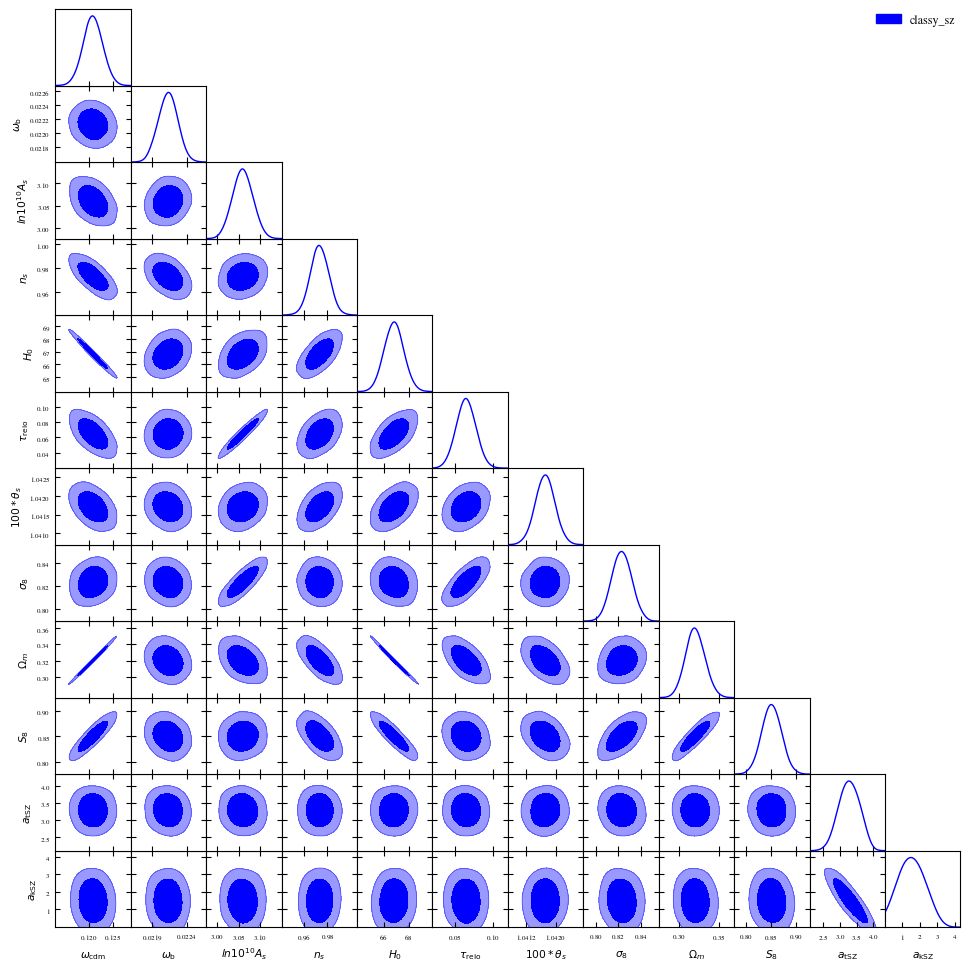

In [70]:
g = plots.getSubplotPlotter()
g.settings.fig_width_inch = 10

g.settings.axes_fontsize = 10
g.settings.lab_fontsize =13

g.settings.legend_fontsize = 14
g.settings.alpha_filled_add=0.1
g.settings.colorbar_label_pad = 20.
g.settings.figure_legend_frame = False

g.settings.title_limit=0 #uncomment if you want to display marg stats.

sample_list = []
for s in range(len(all_samples)):

    sample_list.append(all_samples[s])
    
g.triangle_plot(sample_list,
    [
    'omega_cdm',
    'omega_b',
    'logA',
    'n_s',
    'H0',
    'tau_reio',
    'theta_s_1e2',
    'sigma8',
    'Ombc',
    'S8d5',
    'a_tSZ',
    'a_kSZ',
    ],
    # param_limits={'n_s':(0.97, 1.1)},
    filled=[True,False],
    legend_labels=[ 'classy_sz'],
    legend_loc='upper right',
    colors = ['blue','red','green','red'],
    line_args=[{'lw':'1','color':'blue'},{'lw':'1','color':'red'},{'lw':'1','color':'green'},{'lw':'1','color':'r'}]
                   )


g.export(path_to_chains_dir +'dr6mflike_classy_sz.pdf')

# Evaluate mode and chi2 comparison

In [42]:
Dict_yaml = yaml.safe_load(open('../input_files/dr6mflike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'dr6mflike_evaluate'


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['use_class_sz_fast_mode'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['ell_factor'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['stop_at_error'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['output'] = 'tCl'
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_background_and_thermo'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pkl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pknl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_hubble'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_and_der'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_at_z'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_chi'] = 1 # for this run we dont need this



Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['n_s'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['omega_b'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omega_cdm'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau_reio'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2

Dict_yaml['sampler']['evaluate']['override']['a_tSZ'] = 5.29
Dict_yaml['sampler']['evaluate']['override']['a_kSZ'] = 1.8
Dict_yaml['sampler']['evaluate']['override']['a_p'] =  6.58
Dict_yaml['sampler']['evaluate']['override']['beta_p'] = 2.87
Dict_yaml['sampler']['evaluate']['override']['a_c'] = 3.15
Dict_yaml['sampler']['evaluate']['override']['a_s'] = 3.74
Dict_yaml['sampler']['evaluate']['override']['a_gtt'] = 2.79
Dict_yaml['sampler']['evaluate']['override']['a_gte'] = 0.27
Dict_yaml['sampler']['evaluate']['override']['a_gee'] = 0.130
Dict_yaml['sampler']['evaluate']['override']['a_psee'] =  0.64
Dict_yaml['sampler']['evaluate']['override']['a_pste'] = 0.042
Dict_yaml['sampler']['evaluate']['override']['xi'] =  0.047



Dict_yaml['timing'] = True


with open('../input_files/dr6mflike_evaluate_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [43]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/dr6mflike_evaluate_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'dr6mflike_evaluate'
[output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/dr6mflike_evaluate'
[output] Will delete previous products ('force' was requested).
Metal device set to: Apple M1 Pro
[tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.


2023-05-06 16:48:04.085905: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 16:48:04.086036: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[prior] *WARNING* External prior 'EEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'Radio_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TTdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'tau_planck_prior' loaded. Mind that it might not be normalized!
[classy_szfast.classy_sz.classy_sz] Initialized!
[act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[act_dr6_mflike.actdr6mflike] Initialized!
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[evaluate] Reference point:
   H0 = 68.2
   a_c = 3.15
   a_gee = 0.13
   a_gte = 0.27
   a_gtt = 2.79
   a_kSZ = 1.8
   a_p = 6.58
   a_psee = 0.64
   a_pste = 0.042


0

## Comparison with camb and class

### class ultra-high-accuracy

In [73]:
Dict_yaml = yaml.safe_load(open('../input_files/dr6mflike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'dr6mflike_class_uha_evaluate'


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['use_class_sz_fast_mode'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['ell_factor'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['stop_at_error'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['output'] = 'tCl'
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_background_and_thermo'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pkl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pknl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_hubble'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_and_der'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_at_z'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_chi'] = 1 # for this run we dont need this

Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['use_cmb_cls_from_file'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['cmb_cls_filename'] = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/class_uha_6may23_edeppaper_lcdmbf.pickle'


Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['n_s'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['omega_b'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omega_cdm'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau_reio'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2


# 'ln10^{10}A_s' : 3.043,
# 'n_s' : 1.013,
# 'omega_b' : 0.02149,
# 'omega_cdm' : 0.1170,
# 'tau_reio' : 0.063,
# 'H0' : 68.2

Dict_yaml['sampler']['evaluate']['override']['a_tSZ'] = 5.29
Dict_yaml['sampler']['evaluate']['override']['a_kSZ'] = 1.8
Dict_yaml['sampler']['evaluate']['override']['a_p'] =  6.58
Dict_yaml['sampler']['evaluate']['override']['beta_p'] = 2.87
Dict_yaml['sampler']['evaluate']['override']['a_c'] = 3.15
Dict_yaml['sampler']['evaluate']['override']['a_s'] = 3.74
Dict_yaml['sampler']['evaluate']['override']['a_gtt'] = 2.79
Dict_yaml['sampler']['evaluate']['override']['a_gte'] = 0.27
Dict_yaml['sampler']['evaluate']['override']['a_gee'] = 0.130
Dict_yaml['sampler']['evaluate']['override']['a_psee'] =  0.64
Dict_yaml['sampler']['evaluate']['override']['a_pste'] = 0.042
Dict_yaml['sampler']['evaluate']['override']['xi'] =  0.047



Dict_yaml['timing'] = True


with open('../input_files/dr6mflike_class_uha_evaluate_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [74]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/dr6mflike_class_uha_evaluate_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'dr6mflike_class_uha_evaluate'
[output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/dr6mflike_class_uha_evaluate'
[output] Will delete previous products ('force' was requested).
Metal device set to: Apple M1 Pro
[tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.


2023-05-06 21:24:52.290243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 21:24:52.290375: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[prior] *WARNING* External prior 'EEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'Radio_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TTdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'tau_planck_prior' loaded. Mind that it might not be normalized!
[classy_szfast.classy_sz.classy_sz] Initialized!
[act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[act_dr6_mflike.actdr6mflike] Initialized!
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   H0 = 68.2
   a_c = 3.15
   a_gee = 0.13
   a_gte = 0.27
   a_gtt = 2.79
   a_kSZ = 1.8
   a_p = 6.58
   a_psee = 0.64
   a_pste = 0.042
   a_s = 3.74
   a_tSZ = 5.29
   beta_p = 2.87
   logA = 3.043
   n_s = 1.013
   omega_b = 0.02149
   omega_cdm = 0.117
   tau

0

There seems to be something to figure out here. 

### camb

In [46]:
Dict_yaml = yaml.safe_load(open('../input_files/dr6mflike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'dr6mflike_evaluate_camb'



Dict_yaml['theory'] = {}
Dict_yaml['theory']['camb'] = {}
Dict_yaml['theory']['camb']['extra_args'] ={ 
    'lens_potential_accuracy': 8,
    'mnu': 0.06,
    'nonlinear': True,
    'HMCode_A_baryon': 3.13,
    'HMCode_eta_baryon': 0.603,
    'halofit_version': 'mead2016',
    'HMCode_logT_AGN': 7.8,
    'kmax': 10.,
    'k_per_logint': 130,
    'accurate_massive_neutrino_transfers': True,
    'lens_margin': 2050,
    'lAccuracyBoost': 2.0,
    'AccuracyBoost': 2.0,
    'lSampleBoost': 2.0,
    'DoLateRadTruncation': False
}

Dict_yaml['params']['ombh2'] = Dict_yaml['params'].pop('omega_b')
Dict_yaml['params']['omch2'] = Dict_yaml['params'].pop('omega_cdm')
Dict_yaml['params']['ns'] = Dict_yaml['params'].pop('n_s')
Dict_yaml['params']['tau'] = Dict_yaml['params'].pop('tau_reio')

Dict_yaml['params']['As'] = {
  'value': "lambda logA: 1e-10 * np.exp(logA)",
  'latex': 'A_s'
}

Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['ns'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['ombh2'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omch2'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2

Dict_yaml['sampler']['evaluate']['override']['a_tSZ'] = 5.29
Dict_yaml['sampler']['evaluate']['override']['a_kSZ'] = 1.8
Dict_yaml['sampler']['evaluate']['override']['a_p'] =  6.58
Dict_yaml['sampler']['evaluate']['override']['beta_p'] = 2.87
Dict_yaml['sampler']['evaluate']['override']['a_c'] = 3.15
Dict_yaml['sampler']['evaluate']['override']['a_s'] = 3.74
Dict_yaml['sampler']['evaluate']['override']['a_gtt'] = 2.79
Dict_yaml['sampler']['evaluate']['override']['a_gte'] = 0.27
Dict_yaml['sampler']['evaluate']['override']['a_gee'] = 0.130
Dict_yaml['sampler']['evaluate']['override']['a_psee'] =  0.64
Dict_yaml['sampler']['evaluate']['override']['a_pste'] = 0.042
Dict_yaml['sampler']['evaluate']['override']['xi'] =  0.047


Dict_yaml['prior']['tau_planck_prior'] = 'lambda tau: stats.norm.logpdf(tau, loc=6.5e-2, scale=1.5e-2)'



Dict_yaml['timing'] = True


with open('../input_files/dr6mflike_evaluate_camb_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [47]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/dr6mflike_evaluate_camb_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'dr6mflike_evaluate_camb'
[output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/dr6mflike_evaluate_camb'
[output] Will delete previous products ('force' was requested).
[prior] *WARNING* External prior 'EEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'Radio_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TTdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'tau_planck_prior' loaded. Mind that it might not be normalized!
[camb] `camb` module loaded successfully from /Users/boris/Work/CLASS-SZ/SO-SZ/

0

### camb - hyrec (not clear how to compute)

In [58]:
Dict_yaml = yaml.safe_load(open('../input_files/dr6mflike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'dr6mflike_evaluate_camb-hyrec'



Dict_yaml['theory'] = {}
Dict_yaml['theory']['camb'] = {}
Dict_yaml['theory']['camb']['extra_args'] ={ 
    'lens_potential_accuracy': 8,
    'mnu': 0.06,
    'recombination_model': 'HyRec',
    'nonlinear': True,
    'HMCode_A_baryon': 3.13,
    'HMCode_eta_baryon': 0.603,
    'halofit_version': 'mead2016',
    'HMCode_logT_AGN': 7.8,
    'kmax': 10.,
    'k_per_logint': 130,
    'accurate_massive_neutrino_transfers': True,
    'lens_margin': 2050,
    'lAccuracyBoost': 2.0,
    'AccuracyBoost': 2.0,
    'lSampleBoost': 2.0,
    'DoLateRadTruncation': False
}

Dict_yaml['params']['ombh2'] = Dict_yaml['params'].pop('omega_b')
Dict_yaml['params']['omch2'] = Dict_yaml['params'].pop('omega_cdm')
Dict_yaml['params']['ns'] = Dict_yaml['params'].pop('n_s')
Dict_yaml['params']['tau'] = Dict_yaml['params'].pop('tau_reio')

Dict_yaml['params']['As'] = {
  'value': "lambda logA: 1e-10 * np.exp(logA)",
  'latex': 'A_s'
}

Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['ns'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['ombh2'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omch2'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2

Dict_yaml['sampler']['evaluate']['override']['a_tSZ'] = 5.29
Dict_yaml['sampler']['evaluate']['override']['a_kSZ'] = 1.8
Dict_yaml['sampler']['evaluate']['override']['a_p'] =  6.58
Dict_yaml['sampler']['evaluate']['override']['beta_p'] = 2.87
Dict_yaml['sampler']['evaluate']['override']['a_c'] = 3.15
Dict_yaml['sampler']['evaluate']['override']['a_s'] = 3.74
Dict_yaml['sampler']['evaluate']['override']['a_gtt'] = 2.79
Dict_yaml['sampler']['evaluate']['override']['a_gte'] = 0.27
Dict_yaml['sampler']['evaluate']['override']['a_gee'] = 0.130
Dict_yaml['sampler']['evaluate']['override']['a_psee'] =  0.64
Dict_yaml['sampler']['evaluate']['override']['a_pste'] = 0.042
Dict_yaml['sampler']['evaluate']['override']['xi'] =  0.047


Dict_yaml['prior']['tau_planck_prior'] = 'lambda tau: stats.norm.logpdf(tau, loc=6.5e-2, scale=1.5e-2)'



Dict_yaml['timing'] = True


with open('../input_files/dr6mflike_evaluate_camb-hyrec_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [60]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/dr6mflike_evaluate_camb-hyrec_system.yaml",
                      "-f"]
# subprocess.call(str_cmd_subprocess)

CPU times: user 6 µs, sys: 6 µs, total: 12 µs
Wall time: 16.9 µs


### class v2.9.4

In [48]:
Dict_yaml = yaml.safe_load(open('../input_files/dr6mflike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'dr6mflike_evaluate_classv294'


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['ignore_obsolete'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] ={ 
    'output': 'tCl',
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'c_min': 3.13,
    'eta_0': 0.603,
    'l_max_scalars': 11000,
    'm_ncdm': 0.06,
    'non_linear': 'hmcode',
    # the three high-precision paramaters:
    'k_max_tau0_over_l_max': 15.0,
    'accurate_lensing': 1,
    'perturb_sampling_stepsize': 0.05
}



Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['n_s'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['omega_b'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omega_cdm'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau_reio'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2

Dict_yaml['sampler']['evaluate']['override']['a_tSZ'] = 5.29
Dict_yaml['sampler']['evaluate']['override']['a_kSZ'] = 1.8
Dict_yaml['sampler']['evaluate']['override']['a_p'] =  6.58
Dict_yaml['sampler']['evaluate']['override']['beta_p'] = 2.87
Dict_yaml['sampler']['evaluate']['override']['a_c'] = 3.15
Dict_yaml['sampler']['evaluate']['override']['a_s'] = 3.74
Dict_yaml['sampler']['evaluate']['override']['a_gtt'] = 2.79
Dict_yaml['sampler']['evaluate']['override']['a_gte'] = 0.27
Dict_yaml['sampler']['evaluate']['override']['a_gee'] = 0.130
Dict_yaml['sampler']['evaluate']['override']['a_psee'] =  0.64
Dict_yaml['sampler']['evaluate']['override']['a_pste'] = 0.042
Dict_yaml['sampler']['evaluate']['override']['xi'] =  0.047

Dict_yaml['timing'] = True


with open('../input_files/dr6mflike_evaluate_classv294_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [49]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/dr6mflike_evaluate_classv294_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'dr6mflike_evaluate_classv294'
Metal device set to: Apple M1 Pro
[tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.


2023-05-06 16:53:10.453227: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 16:53:10.453351: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[prior] *WARNING* External prior 'EEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'Radio_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TTdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'tau_planck_prior' loaded. Mind that it might not be normalized!
[classy_szfast.classy_sz.classy_sz] Initialized!
[act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[act_dr6_mflike.actdr6mflike] Initialized!
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[evaluate] Reference point:
   H0 = 68.2
   a_c = 3.15
   a_gee = 0.13
   a_gte = 0.27
   a_gtt = 2.79
   a_kSZ = 1.8
   a_p = 6.58
   a_psee = 0.64
   a_pste = 0.042


0

### class v3

In [50]:
Dict_yaml = yaml.safe_load(open('../input_files/dr6mflike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'dr6mflike_evaluate_classv3'



Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy'] = {}
Dict_yaml['theory']['classy']['extra_args'] ={ 
    'output': 'tCl',
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'c_min': 3.13,
    'eta_0': 0.603,
    'l_max_scalars': 11000,
    'm_ncdm': 0.06,
    'non_linear': 'hmcode',
    # the three high-precision paramaters:
    'k_max_tau0_over_l_max': 15.0,
    'accurate_lensing': 1,
    'perturbations_sampling_stepsize': 0.05,
    'recombination': 'RECFAST',
}

Dict_yaml['params']['logA']['drop'] = True
Dict_yaml['params']['A_s'] = {
  'value': "lambda logA: 1e-10 * np.exp(logA)",
  'latex': 'A_s'
}

Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['n_s'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['omega_b'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omega_cdm'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau_reio'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2


Dict_yaml['sampler']['evaluate']['override']['a_tSZ'] = 5.29
Dict_yaml['sampler']['evaluate']['override']['a_kSZ'] = 1.8
Dict_yaml['sampler']['evaluate']['override']['a_p'] =  6.58
Dict_yaml['sampler']['evaluate']['override']['beta_p'] = 2.87
Dict_yaml['sampler']['evaluate']['override']['a_c'] = 3.15
Dict_yaml['sampler']['evaluate']['override']['a_s'] = 3.74
Dict_yaml['sampler']['evaluate']['override']['a_gtt'] = 2.79
Dict_yaml['sampler']['evaluate']['override']['a_gte'] = 0.27
Dict_yaml['sampler']['evaluate']['override']['a_gee'] = 0.130
Dict_yaml['sampler']['evaluate']['override']['a_psee'] =  0.64
Dict_yaml['sampler']['evaluate']['override']['a_pste'] = 0.042
Dict_yaml['sampler']['evaluate']['override']['xi'] =  0.047


Dict_yaml['timing'] = True


with open('../input_files/dr6mflike_evaluate_classv3_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [51]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/dr6mflike_evaluate_classv3_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'dr6mflike_evaluate_classv3'
[prior] *WARNING* External prior 'EEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'Radio_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TTdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'tau_planck_prior' loaded. Mind that it might not be normalized!
[classy] `classy` module loaded successfully from /Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy-3.2.0-py3.9-macosx-11.0-arm64.egg
[act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[act_dr6_mflike.actdr6mflike] Initialized!
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[

0

### class v3 - hyrec 

In [52]:
Dict_yaml = yaml.safe_load(open('../input_files/dr6mflike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'dr6mflike_evaluate_classv3-hyrec'



Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy'] = {}
Dict_yaml['theory']['classy']['extra_args'] ={ 
    'output': 'tCl',
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'c_min': 3.13,
    'eta_0': 0.603,
    'l_max_scalars': 11000,
    'm_ncdm': 0.06,
    'non_linear': 'hmcode',
    # the three high-precision paramaters:
    'k_max_tau0_over_l_max': 15.0,
    'accurate_lensing': 1,
    'perturbations_sampling_stepsize': 0.05,
    'recombination': 'HYREC',
}

Dict_yaml['params']['logA']['drop'] = True
Dict_yaml['params']['A_s'] = {
  'value': "lambda logA: 1e-10 * np.exp(logA)",
  'latex': 'A_s'
}

Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['n_s'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['omega_b'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omega_cdm'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau_reio'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2


Dict_yaml['sampler']['evaluate']['override']['a_tSZ'] = 5.29
Dict_yaml['sampler']['evaluate']['override']['a_kSZ'] = 1.8
Dict_yaml['sampler']['evaluate']['override']['a_p'] =  6.58
Dict_yaml['sampler']['evaluate']['override']['beta_p'] = 2.87
Dict_yaml['sampler']['evaluate']['override']['a_c'] = 3.15
Dict_yaml['sampler']['evaluate']['override']['a_s'] = 3.74
Dict_yaml['sampler']['evaluate']['override']['a_gtt'] = 2.79
Dict_yaml['sampler']['evaluate']['override']['a_gte'] = 0.27
Dict_yaml['sampler']['evaluate']['override']['a_gee'] = 0.130
Dict_yaml['sampler']['evaluate']['override']['a_psee'] =  0.64
Dict_yaml['sampler']['evaluate']['override']['a_pste'] = 0.042
Dict_yaml['sampler']['evaluate']['override']['xi'] =  0.047

Dict_yaml['timing'] = True


with open('../input_files/dr6mflike_evaluate_classv3-hyrec_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [53]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/dr6mflike_evaluate_classv3-hyrec_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'dr6mflike_evaluate_classv3-hyrec'
[prior] *WARNING* External prior 'EEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'Radio_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TEdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'TTdust_prior' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'tau_planck_prior' loaded. Mind that it might not be normalized!
[classy] `classy` module loaded successfully from /Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy-3.2.0-py3.9-macosx-11.0-arm64.egg
[act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[act_dr6_mflike.actdr6mflike] Initialized!
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero pr

0

# Minimizer run

In [61]:
Dict_yaml = yaml.safe_load(open('../input_files/dr6mflike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'dr6mflike_minimize'


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['use_class_sz_fast_mode'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['ell_factor'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['stop_at_error'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['output'] = 'tCl'
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_background_and_thermo'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pkl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pknl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_hubble'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_and_der'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_at_z'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_chi'] = 1 # for this run we dont need this



Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['minimize'] = {}
Dict_yaml['sampler']['minimize']['method'] = 'bobyqa'
Dict_yaml['sampler']['minimize']['ignore_prior'] = False 
Dict_yaml['sampler']['minimize']['max_evals'] = 1e6
Dict_yaml['sampler']['minimize']['confidence_for_unbounded'] = 0.9999995
Dict_yaml['sampler']['minimize']['override_scipy'] = 'null' 
Dict_yaml['sampler']['minimize']['override_bobyqa'] = {}
Dict_yaml['sampler']['minimize']['override_bobyqa']['rhoend'] = 0.01
Dict_yaml['sampler']['minimize']['covmat'] = path_to_chains_dir + '../covmats/dr6mflike.covmat'


Dict_yaml['timing'] = True


with open('../input_files/dr6mflike_minimize_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [62]:
%%time
str_cmd_subprocess = ["mpirun",
                      "-np",
                      "4",
                      "cobaya-run",
                      "../input_files/dr6mflike_minimize_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[0 : output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'dr6mflike_minimize'
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

[0 : tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.
[1 : tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.
[2 : tensorflow] *WARNING* Please fix your

2023-05-06 17:36:40.407641: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 17:36:40.407641: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 17:36:40.407662: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 17:36:40.407722: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 17:36:40.407880: I tensorflow/core/common_runtime/plu

[0 : prior] *WARNING* External prior 'EEdust_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'Radio_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'TEdust_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'TTdust_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'tau_planck_prior' loaded. Mind that it might not be normalized!
[0 : classy_szfast.classy_sz.classy_sz] Initialized!
[2 : classy_szfast.classy_sz.classy_sz] Initialized!
[1 : classy_szfast.classy_sz.classy_sz] Initialized!
[3 : classy_szfast.classy_sz.classy_sz] Initialized!
[0 : act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[0 : act_dr6_mflike.actdr6mflike] Initialized!
[2 : act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[3 : act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[1 : act_dr6_mflike.actdr6mflike] Number of bins used: 2639
[2 : act

0

# Minimizer run - camb

In [13]:
Dict_yaml = yaml.safe_load(open('../input_files/dr6mflike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'dr6mflike_minimize_camb'


Dict_yaml['theory'] = {}
Dict_yaml['theory']['camb'] = {}
Dict_yaml['theory']['camb']['extra_args'] ={ 
    'lens_potential_accuracy': 8,
    'mnu': 0.06,
    'nonlinear': True,
    'HMCode_A_baryon': 3.13,
    'HMCode_eta_baryon': 0.603,
    'halofit_version': 'mead2016',
    'HMCode_logT_AGN': 7.8,
    'kmax': 10.,
    'k_per_logint': 130,
    'accurate_massive_neutrino_transfers': True,
    'lens_margin': 2050,
    'lAccuracyBoost': 2.0,
    'AccuracyBoost': 2.0,
    'lSampleBoost': 2.0,
    'DoLateRadTruncation': False
}

Dict_yaml['params']['ombh2'] = Dict_yaml['params'].pop('omega_b')
Dict_yaml['params']['omch2'] = Dict_yaml['params'].pop('omega_cdm')
Dict_yaml['params']['ns'] = Dict_yaml['params'].pop('n_s')
Dict_yaml['params']['tau'] = Dict_yaml['params'].pop('tau_reio')

Dict_yaml['params']['As'] = {
  'value': "lambda logA: 1e-10 * np.exp(logA)",
  'latex': 'A_s'
}



Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['minimize'] = {}
Dict_yaml['sampler']['minimize']['method'] = 'bobyqa'
Dict_yaml['sampler']['minimize']['ignore_prior'] = False 
Dict_yaml['sampler']['minimize']['max_evals'] = 1e6
Dict_yaml['sampler']['minimize']['confidence_for_unbounded'] = 0.9999995
Dict_yaml['sampler']['minimize']['override_scipy'] = 'null' 
Dict_yaml['sampler']['minimize']['override_bobyqa'] = {}
Dict_yaml['sampler']['minimize']['override_bobyqa']['rhoend'] = 0.01
Dict_yaml['sampler']['minimize']['covmat'] = path_to_chains_dir + '../covmats/dr6mflike.covmat'

Dict_yaml['prior']['tau_planck_prior'] = 'lambda tau: stats.norm.logpdf(tau, loc=6.5e-2, scale=1.5e-2)'

Dict_yaml['timing'] = True


with open('../input_files/dr6mflike_minimize_camb_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [14]:
%%time
str_cmd_subprocess = ["mpirun",
                      "-np",
                      "4",
                      "cobaya-run",
                      "../input_files/dr6mflike_minimize_camb_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[0 : output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'dr6mflike_minimize_camb'
[0 : output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/dr6mflike_minimize_camb'
[0 : output] Will delete previous products ('force' was requested).
[0 : prior] *WARNING* External prior 'EEdust_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'Radio_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'TEdust_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'TTdust_prior' loaded. Mind that it might not be normalized!
[0 : prior] *WARNING* External prior 'tau_planck_prior' loaded. Mind that it might not be normalized!
[0 : camb] `camb` module loaded successfully fr

KeyboardInterrupt: 